importing Jupyter notebook from Vogel.ipynb
100 year return period precipitation:8919.79 inch


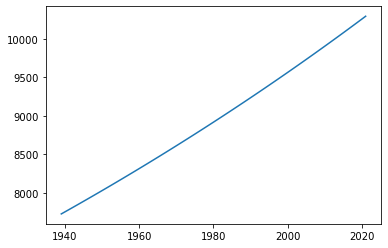

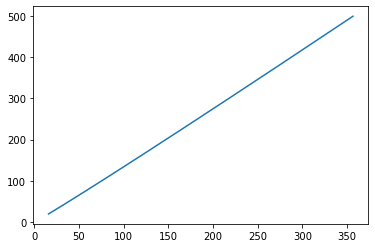

   100 year storm  200 year storm  500 year storm  1000 year storm
0      100.000000      200.000000      500.000000      1000.000000
1       75.436580      147.242416      357.263857       699.552480
2       57.502741      109.551957      258.019871       494.677192
3       44.288476       82.369608      188.339704       353.579363
4       34.463352       62.581670      138.941994       255.444353
5       27.092902       48.043241      103.586893       186.521845
importing Jupyter notebook from check_ln2.ipynb
Log normal using MOM: KstestResult(statistic=0.07867254316796879, pvalue=0.7269309424233992)
Log normal using MLE: KstestResult(statistic=0.08298852931215711, pvalue=0.6650820916718099)


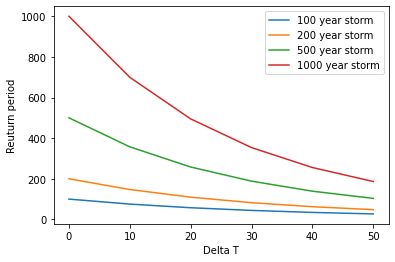

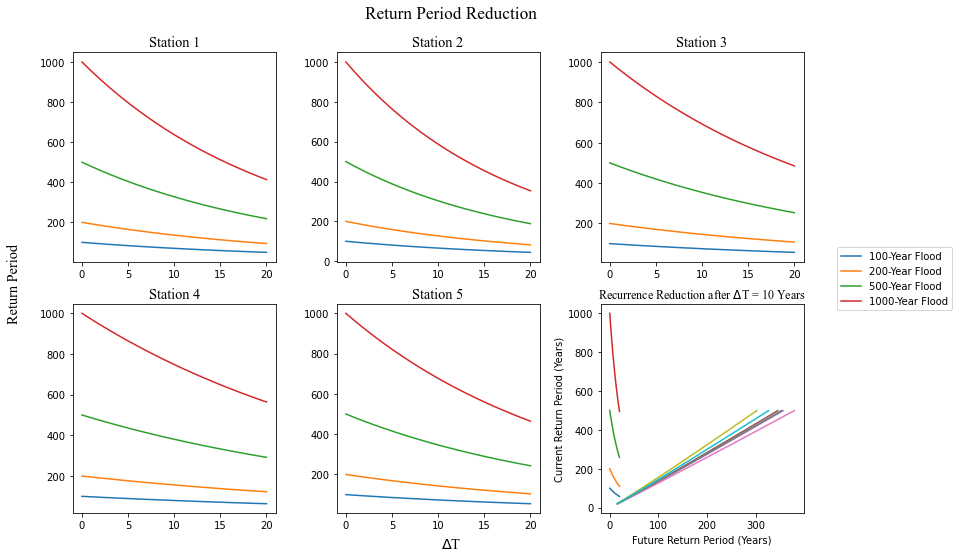

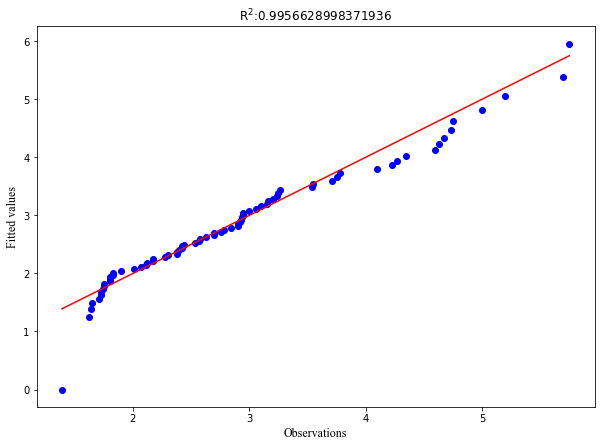

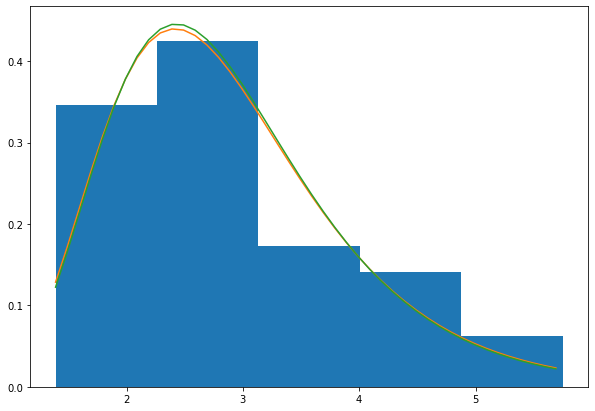

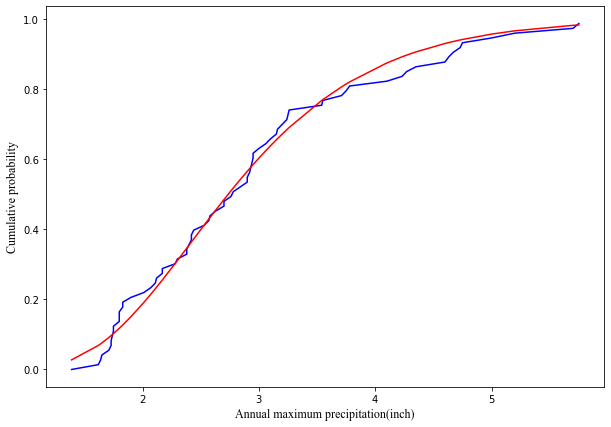

importing Jupyter notebook from Fall_trend_test.ipynb


In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import statsmodels.api as sm
import statsmodels.formula.api as smf
from scipy import stats as ss
import scipy.signal
from astropy.stats import bootstrap as bootstrap
from statsmodels.tsa.ar_model import AutoReg
import math
import common_func as cf
import import_ipynb
from Vogel import find_trend as ft
import check_ln2

import Fall_trend_test as Fall

In [6]:

#MannKendall Test

# function for determining tie groups and corresponding number of ties.
def count_ties(x):
    ties = []
    y = x
    while len(x) > 0: 
        ties.append(np.where(x == x[0])[0].size)
        x = np.delete(x, np.where(x == x[0]))
    ties=np.array(ties)
    return ties

#function for calculating variance in mann kendall test
def var(x):
    n = len(x)
    var = n * (n - 1) * (2 * n + 5)
    e = count_ties(x)
    extent_sum = np.sum(e * (e - 1) * (2 * e + 5))
    return  (var - extent_sum)/18

# function for testing pvalue and critical value of mann kendall test
def mktest(z):
    alpha = 0.05    # alpha = 0.1 
    CritVal = np.abs(ss.norm.ppf(alpha / 2))
    pvalue = ss.norm.sf(np.abs(z)) * 2 
    print('pvalue:',pvalue)
# Reject H0 if |Z-Score| > CritVal and, equivalently, if p-value < alpha/2
    reject1 = CritVal < np.abs(z)
    reject2 = pvalue < alpha
    if reject1:
        return 'Yes'
    return 'No'
# Mann Kendall Test
def main_mk(maxQ):
    T = 0
    data = np.log(maxQ)
    for j in range(len(data)-1):
        t = data[j] - (data[j+1:])
        T += (np.where(t < 0))[0].size - (np.where(t > 0))[0].size
    variance = var(data)
    if T > 0:
        z = (T - 1)/(np.sqrt(variance))
    else:
        z = (T + 1)/(np.sqrt(variance))
    print('Z_value:',z)
    trend = mktest(z)
    print('Is there a monotonic trend?',trend,'\n')

In [7]:
def acf_pacf(maxQ):
    sm.graphics.tsa.plot_acf(np.log(maxQ))
    plt.show()
    sm.graphics.tsa.plot_pacf(np.log(maxQ))
    plt.show()

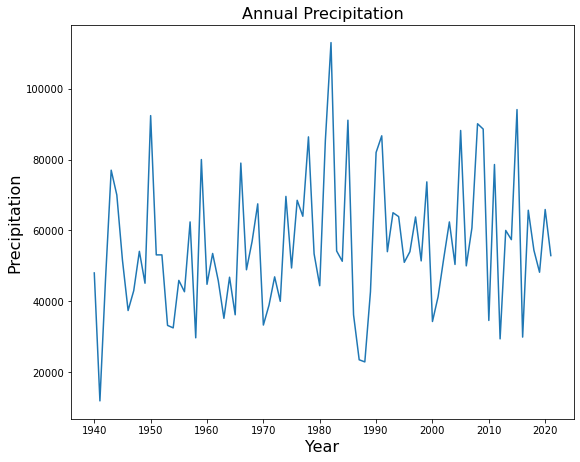

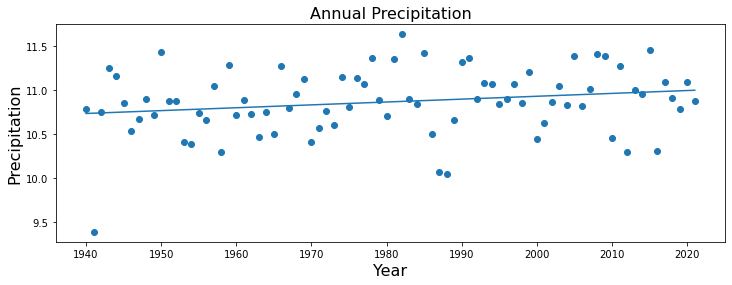

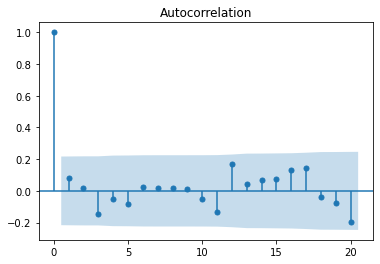

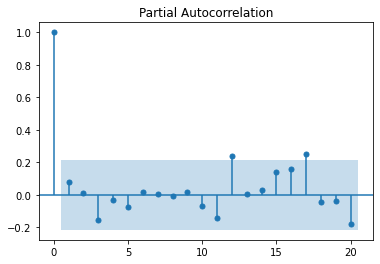

Z_value: 1.9262202853906423
pvalue: 0.05407687394303298
Is there a monotonic trend? No 

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.043
Model:                            OLS   Adj. R-squared:                  0.031
Method:                 Least Squares   F-statistic:                     3.606
Date:                Sat, 05 Mar 2022   Prob (F-statistic):             0.0612
Time:                        18:52:52   Log-Likelihood:                -33.532
No. Observations:                  82   AIC:                             71.06
Df Residuals:                      80   BIC:                             75.88
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------

In [8]:
# Streamflow data: Stations 1-6: 
# Stations = ['station_04208000.csv','station_04196800.csv','station_04195500.csv','station_04193500.csv','station_04189000.csv','station_03117000.csv']

Data = pd.read_csv('station_04193500.csv')
maxQ, yearMaxQ = cf.annual_max(Data)
###FALL
# maxQ, yearMaxQ = Fall.Fall_max(Data)

#OLS regression: 
lr = ft(np.log(maxQ), yearMaxQ)
#Trend Line: 
beta = lr.params[1]
interc = lr.params[0]
y = beta*yearMaxQ+interc
# Confidence Interval:
CI = lr.conf_int(alpha=0.05)
#higher CI:
beta_H = CI[1][1]
interc_H = CI[0][1]
yH = beta_H*yearMaxQ + interc_H
#Lower CI: 
beta_L = CI[1][0]
interc_L = CI[0][0]
yL = beta_L*yearMaxQ + interc_L


# Annual Max Plot: 
fig = plt.figure()
plt.plot(yearMaxQ, maxQ)
plt.xlabel('Year', fontsize=16)
plt.ylabel('Precipitation', fontsize=16)
plt.title('Annual Precipitation', fontsize=16)
fig.set_size_inches([9, 7.25])
fig.savefig('Annual Precipitation', dpi=300)
plt.show()

#Annual Maxima with trend line plot: 
fig = plt.figure()
plt.scatter(yearMaxQ, np.log(maxQ))
plt.plot(yearMaxQ,y)
# plt.plot(yearMaxQ,yH)
# plt.plot(yearMaxQ,yL)
plt.xlabel('Year', fontsize=16)
plt.ylabel('Precipitation', fontsize=16)
plt.title('Annual Precipitation', fontsize=16)
fig.set_size_inches([12, 4])
fig.savefig('Annual Precipitation', dpi=300)
plt.show()


#TESTS
# m = check_ln2.qq_plot(maxQ)
acf_pacf(maxQ)
main_mk(maxQ)
lr = ft(np.log(maxQ), yearMaxQ)
print(lr.summary())
